In [1]:
import numpy as np
import matplotlib.pyplot as plt
from distance_in_fiber import distance_in_mat
%matplotlib inline

In [2]:
def distance_in_fiber(x , fiber_radius):
    if(abs(x)>fiber_radius):
        return 0
    return 2*np.sqrt(fiber_radius**2-x**2)


In [3]:
def distance_in_mat(x , fiber_radius, fiber_pitch, num_layers):
    
    #Pattern is periodic with fiber pitch
    x = x % fiber_pitch
    num_s = int(num_layers/2)
    num_u= num_layers-num_s
    #First Fibers in unshifted rows
    output = num_u*distance_in_fiber(x,fiber_radius)
    #Fiber in shifted rows bootom right shifted rows
    output += num_s*distance_in_fiber(x-fiber_pitch/2,fiber_radius)
    #Nex fibers to ther right in unshited rows
    output += num_u*distance_in_fiber(x-fiber_pitch, fiber_radius) 
    #calculate total length traveled in mat
    total = 2*fiber_radius+(num_layers-1)*0.21
    return output/total
distance_in_mat = np.vectorize(distance_in_mat)

In [17]:
x = np.linspace(0,0.3,200)
y = distance_in_mat(x,.125*0.94,.28,6)

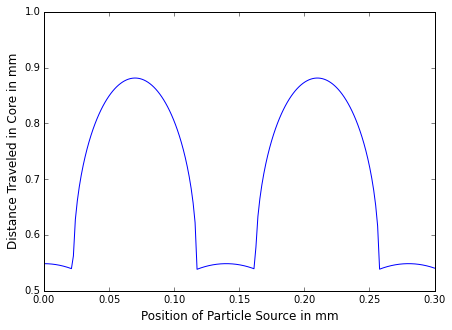

In [19]:
plt.plot(x,y)
plt.xlabel("Position of Particle Source in mm",fontsize="large")
plt.ylabel("Distance Traveled in Core in mm",fontsize="large")
plt.ylim(0.5,1)
plt.gcf().set_size_inches((7,5))
plt.savefig("distance_in_fiber_core.pdf")

In [ ]:
y_vals = np.random.uniform(0,.27,size=10000)

In [ ]:
distance_vals =distance_in_mat(y_vals,.125*0.94,.27,6)
weights = np.ones_like(distance_vals)#/len(distance_vals)

In [ ]:
plt.hist(distance_vals,weights=weights, bins=500, histtype="step", normed=False, stacked=True)
plt.xlabel(r"Proportion of distance travelled in core",fontsize="large")
plt.ylabel("Number of Events",fontsize="large")
plt.xlim(0.5,1)
plt.gcf().set_size_inches((7,5))
plt.savefig("distance_distribution.pdf")

In [13]:
plt.hist?

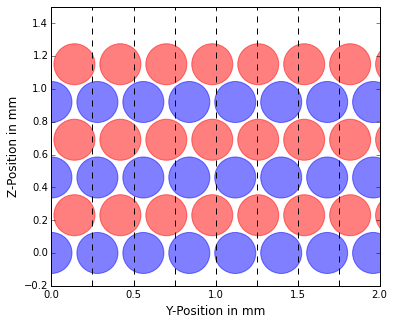

In [14]:
plt.cla()
ax =plt.gca()
ax.set_xlim(0,2.)
ax.set_ylim(-.2,1.5)

num_layes = 6
per_layer =10
pitch_y = .28
pitch_z =.23
fiber_rad = .125
for i in range (num_layes):
    if i %2 == 0:
        col = "b"
        offset = 0
    else:
        col = "r"
        offset = pitch_y/2
    for j in range(per_layer):
        circ = plt.Circle((j*pitch_y+ offset,i*pitch_z), radius=fiber_rad,color=col, alpha= 0.5 )
        ax.add_patch(circ)

#Draw lines Representing Channels

for x in np.arange(0,2.1,.250):
    line = plt.Line2D([x,x],(-0.2,1.5),linewidth=1, color="k", linestyle="dashed")
    ax.add_artist(line)
plt.xlabel(r"Y-Position in mm",fontsize="large")
plt.ylabel(r"Z-Position in mm",fontsize="large")
ax.set_aspect(1)
plt.gcf().set_size_inches((7,5))
plt.savefig("fiber_vs_channel.pdf")

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

array(3.5211267605633805)